In [22]:
import os
import pickle
import numpy as np
from sklearn import svm, metrics
from astropy.table import Table
from sklearn.model_selection import train_test_split

In [2]:
scratchbase = os.path.expanduser("~/scratch")

GRB_dpi_dir = "GRBdpi"
GLITCH_dpi_dir = os.path.join(scratchbase, "GLITCHdpi")

GRBdpifiles = [f for f in os.listdir(GRB_dpi_dir) if f.endswith('.npy')]
GLITCHdpifiles = [f for f in os.listdir(GLITCH_dpi_dir) if f.endswith('npy')]

#n_samples = len(dpifiles)

data = []
targets = []

# GRB
for dpifile in GRBdpifiles:
    dpi_path = os.path.join(GRB_dpi_dir, dpifile)
    
    dpi = np.load(dpi_path, allow_pickle=True)
    
    flattened = np.ravel(dpi)
    
    data.append(flattened)
    
    targets.append("GRB")
    
# GLTICH
for dpifile in GLITCHdpifiles:
    dpi_path = os.path.join(GLITCH_dpi_dir, dpifile)
    
    dpi = np.load(dpi_path, allow_pickle=True)
    
    flattened = np.ravel(dpi) 

    data.append(flattened)
    
    targets.append("GLITCH")

    
data = np.array(data)
targets = np.array(targets)

print(f"Data shape: {data.shape}") 
print(f"Targets shape: {targets.shape}")

Data shape: (503, 49478)
Targets shape: (503,)


In [23]:
#support vector classifier
clf = svm.SVC(probability=True)
# (probability=True) in the SVC ()

#80% train and 20% test 
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, shuffle=True, stratify=targets)

#Learn the digits on the train subset
clf.fit(X_train, y_train)




#Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
probabilities = clf.predict_proba(X_test)

#turning classes into 0 (glitch) and 1 (grb)
class_indices = {cls: idx for idx, cls in enumerate(clf.classes_)}

print(f"X_text length: {len(X_test)}")   # y stuff is labels
print(f"Train length: {len(X_train)}")

# print prediction with the real label
#for i in range(5):
for i in range(len(X_test)):   #for i in range(3): prints 3
    print(f"\n   Test {i+1}:")
    print(f"Predicted: {predicted[i]}")
    print(f"REAL: {y_test[i]}")
    #print(f"Probability: {probabilities[i]}")
    
    predicted_class_index = class_indices[predicted[i]]

    print(f"Confidence in predicted class: {probabilities[i][predicted_class_index]:.4f}")
    print("_" * 42)  # Separator line for clarity

X_text length: 101
Train length: 402

   Test 1:
Predicted: GRB
REAL: GLITCH
Confidence in predicted class: 0.0178
__________________________________________

   Test 2:
Predicted: GRB
REAL: GRB
Confidence in predicted class: 0.9676
__________________________________________

   Test 3:
Predicted: GRB
REAL: GLITCH
Confidence in predicted class: 0.0023
__________________________________________

   Test 4:
Predicted: GRB
REAL: GRB
Confidence in predicted class: 0.9568
__________________________________________

   Test 5:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 1.0000
__________________________________________

   Test 6:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 1.0000
__________________________________________

   Test 7:
Predicted: GRB
REAL: GRB
Confidence in predicted class: 0.9165
__________________________________________

   Test 8:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 1.0000
______________________________________

In [24]:
accuracy = np.mean(predicted == y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.85


In [25]:
import matplotlib.pyplot as plt

print(probabilities[i][predicted_class_index])

0.9195731870134927


## opening model later as pickle

import pickle

#### Load the model
with open("svm_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

#### Use it to make predictions
new_data = np.array([...])  # Shape must match the training data shape
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  4., 49.]),
 array([0.36858743, 0.40805071, 0.44751399, 0.48697727, 0.52644055,
        0.56590383, 0.60536711, 0.64483039, 0.68429367, 0.72375695,
        0.76322023, 0.8026835 , 0.84214678, 0.88161006, 0.92107334,
        0.96053662, 0.9999999 ]),
 <BarContainer object of 16 artists>)

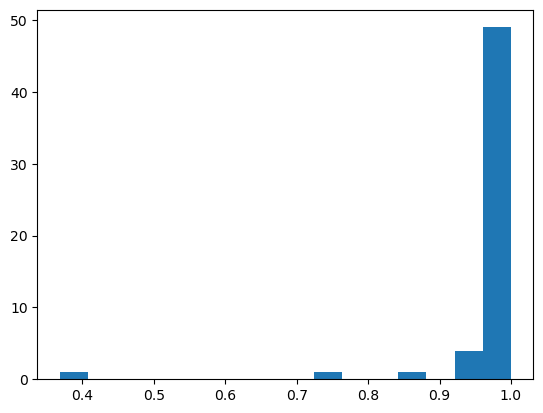

In [6]:
bl = y_test == "GLITCH"
plt.hist(probabilities[:,0][bl],bins=16)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,
         0.,  9., 30.]),
 array([0.72973559, 0.74484904, 0.75996249, 0.77507594, 0.79018938,
        0.80530283, 0.82041628, 0.83552973, 0.85064317, 0.86575662,
        0.88087007, 0.89598352, 0.91109696, 0.92621041, 0.94132386,
        0.95643731, 0.97155075]),
 <BarContainer object of 16 artists>)

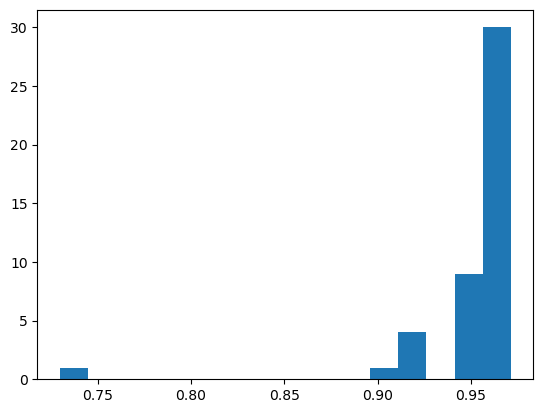

In [7]:
bl = y_test == "GRB"
plt.hist(probabilities[:,1][bl],bins=16)

## tpr and fpr for glitch detections
#### glitch switched to positive class (1)

In [26]:
print(clf.classes_)
# 0, 1

['GLITCH' 'GRB']


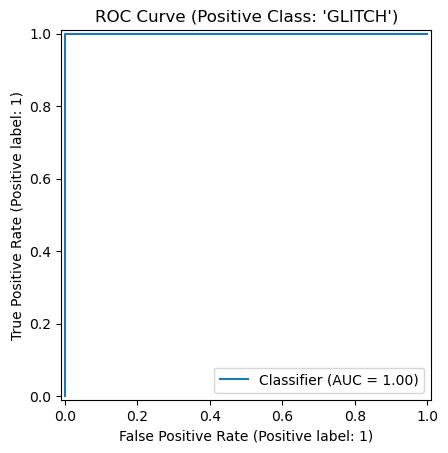

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

positiveclass_is1 = class_indices['GLITCH']   # glitch index

y_score = probabilities[:, positiveclass_is1]   #glitch proba

y_test_is1 = [1 if label == 'GLITCH' else 0 for label in y_test]   #assign binary  1 is positive class

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test_is1, y_score)
plt.title("ROC Curve (Positive Class: 'GLITCH')")
plt.show()


It does not guess a GLITCH on a true GRB (AREA UNDER CURVE)

## grb as positive class

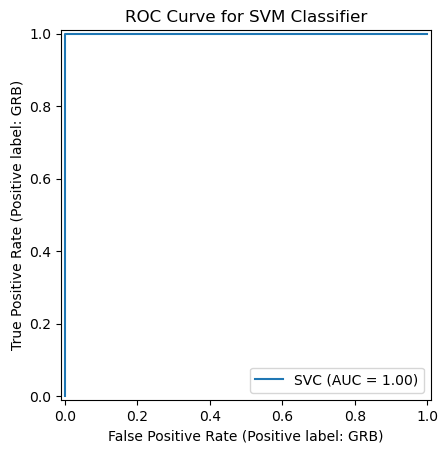

In [38]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve for SVM Classifier")
plt.show()

.

.

.

.

.

.

# COMBINED SVMs

markdown

In [22]:
resolution = "lowRES"   # choose from 'original' or 'lowRES'
score_command = "roc_curve"     # choose from "accuracy", "roc_curve", or "histograms"

In [23]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

In [32]:
def load_dpis(dpi_dir, label):
    files = [f for f in os.listdir(dpi_dir) if f.endswith('.npy')]
    data = []
    targets = []
    
    for file in files:
        dpi = np.load(os.path.join(dpi_dir, file), allow_pickle=True)
        data.append(np.ravel(dpi)) #flattening dpi
        targets.append(label)
        
    return data, targets


def trainSVM(resolution="original"):
    
    results = {}
    
    GRBdpidir = {"original": "GRBdpi", "lowRES": "GRBdpi_lowRES"}
    GLITCHdpidir = {"original": os.path.expanduser("~/scratch/GLITCHdpi"), "lowRES": os.path.expanduser("~/scratch/GLITCHdpi_lowRES")}

    print(f"\n\nTraining with {resolution} SVM resolution...")
    
    GRBdir = GRBdpidir[resolution]
    GLITCHdir = GLITCHdpidir[resolution]
    
    grb_data, grb_targets = load_dpis(GRBdir, "GRB")
    glitch_data, glitch_targets = load_dpis(GLITCHdir, "GLITCH")

    data = np.array(grb_data + glitch_data)
    targets = np.array(grb_targets + glitch_targets)
    
    print(f"Data shape: {data.shape}")
    print(f"Targets shape: {targets.shape}")

    
    
    # Support Vector Model here
    clf = svm.SVC(probability=True)
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, shuffle=True, stratify=targets)
    
    clf.fit(X_train, y_train)
    
    # SAVING SVM
    model_name = f"smv_{resolution}_model2.0.pkl"
    with open(model_name, "wb") as f:
        pickle.dump(clf, f)
        
    # dictionary    
    #classifiers[resolution] = clf

    predicted = clf.predict(X_test)
    probabilities = clf.predict_proba(X_test)

    class_indices = {cls: idx for idx, cls in enumerate(clf.classes_)}

    results[resolution] = {
        "clf": clf,
        "X_test": X_test,
        "y_test": y_test,
        "predicted": predicted,
        "probabilities": probabilities,
        "class_indices": class_indices
    }
    
    
    # Print predictions and confidence for a few test samples
    for i in range(len(X_test)):
        print(f"\nTest {i+1}:")
        print(f"Predicted: {predicted[i]}")
        print(f"REAL: {y_test[i]}")
        predicted_class_index = class_indices[predicted[i]]
        print(f"Confidence in predicted class: {probabilities[i][predicted_class_index]:.4f}")
        print("_" * 42)
        
    return results


def visualize(results, score_command = "accuracy", resolution = "original"):
    clf = results["clf"]
    X_test = results["X_test"]
    y_test = results["y_test"]
    predicted = results["predicted"]
    probabilities = results["probabilities"]
    class_indices = results["class_indices"]
    
    if score_command == "accuracy":
        accuracy = np.mean(predicted == y_test)
        print(f"\nModel accuracy ({resolution}): {accuracy:.2f}")

    elif score_command == "roc_curve":
        positiveclass_is1 = class_indices['GLITCH']
        y_score = probabilities[:, positiveclass_is1]
        y_test_is1 = [1 if label == 'GLITCH' else 0 for label in y_test]

        RocCurveDisplay.from_predictions(y_test_is1, y_score)
        plt.title(f"ROC Curve ({resolution}, Positive Class: 'GLITCH')")
        plt.show()

    elif score_command == "histograms":
        glitch_index = class_indices["GLITCH"]
        grb_index = class_indices["GRB"]

        bin_edges = np.linspace(0, 1, 17)
        
        bl = y_test == "GLITCH"
        plt.hist(probabilities[:, glitch_index][bl], bins=bin_edges, alpha=0.5, label="GLITCH")
        
        bl = y_test == "GRB"
        plt.hist(probabilities[:, grb_index][bl], bins=bin_edges, alpha=0.5, label="GRB")
        
        plt.title(f"{resolution} SVM Confidence Level Histogram")
        plt.legend()
        plt.show()

    else:
        print("Invalid score_command. Choose from: 'accuracy', 'roc_curve', or 'histograms'")
    

### main and score calling

In [33]:
def main(resolution="original", score_command="accuracy"):
    all_results = trainSVM(resolution=resolution)
    results = all_results[resolution]
    visualize(results, score_command=score_command, resolution=resolution)



Training with lowRES SVM resolution...
Data shape: (502, 512)
Targets shape: (502,)

Test 1:
Predicted: GRB
REAL: GRB
Confidence in predicted class: 0.9600
__________________________________________

Test 2:
Predicted: GRB
REAL: GLITCH
Confidence in predicted class: 0.2043
__________________________________________

Test 3:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 0.9505
__________________________________________

Test 4:
Predicted: GRB
REAL: GRB
Confidence in predicted class: 0.9216
__________________________________________

Test 5:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 0.9988
__________________________________________

Test 6:
Predicted: GRB
REAL: GRB
Confidence in predicted class: 0.8731
__________________________________________

Test 7:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 0.9867
__________________________________________

Test 8:
Predicted: GLITCH
REAL: GLITCH
Confidence in predicted class: 1.0000
__________

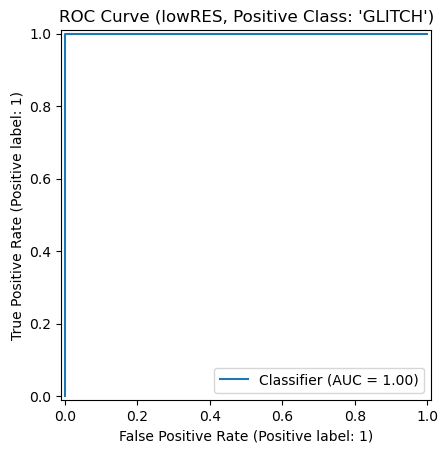

In [44]:
main(resolution=resolution, score_command=score_command)